# K-Means Clustering - Santa Clara University - Abir Chakraborty MSBA(2019)  
### Using SciKit API, cluster the Iris dataset (<a href="https://raw.githubusercontent.com/mahmoudparsian/machine-learning-course/master/data/iris/iris.csv">download</a>).

#### The last column is a classification of Iris data (you need to drop it for your clustering -- since K-means is an unsupervised ML algorithm ).

#### (A) Run the K-means algorithm and compute the accuracy of your clustering. Unlike classification, the cluster ids of your k-means clusters will in general not correspond with the class labels. You must first compute the optimal mapping of cluster ids to class labels (for example, associate class 1 with cluster 3, class 2 with cluster 1, and class 3 with cluster 2).

#### (B) You should also compute the confusion matrix for your clustering results. Submit results for one sample run giving the initial clustering, final clusterings, and confusion matrix. Interpret your results to a high-school student.

#### (C) Run K-means algorithm 50 times over the Iris dataset, each time using a different initialization. For each run, compute both the accuracy of clustering, as well as the k-means objective function value of the final clustering.  Plot the distribution of these accuracies and also plot the distribution of the objective function values. Finally, give a scatter plot showing the correlation (if any) between the clustering accuracy and the clustering objective function value. Write a paragraph to interpret these graphs - what can you conclude?

### Usual Stuff

In [622]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
import tkinter as tk
import sklearn.metrics as sm
from tkinter import filedialog
from random import randint
import random
from IPython.display import clear_output, display
from matplotlib.image import imread
from sklearn import datasets
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.patches as mpatches

#### Lets load the IRIS Data base, First select the file for the IRIS dataset

***really important--am not Hardcoding the file, User have to browse the file path. Its up to user to brows the correct IRIS File***

In [623]:
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename()

In [624]:
df = pd.read_csv(file_path)

#### Lets Look at the Data

In [625]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Drop the species column(as we are not doing Supervised learning)

In [626]:
# Everything is trainig dataset, remove the species as we are clustering on it.
y = pd.DataFrame(df['species'])
x = df.drop(['species'], axis=1)
iris = datasets.load_iris()

In [627]:
# We must first compute the optimal mapping of cluster ids to class labels
y.loc[(df.species == 'setosa'),'species']= 0
y.loc[(df.species == 'versicolor'),'species']= 1
y.loc[(df.species == 'virginica'),'species']= 2

In [628]:
# Change Labels
y.columns = ['Target']
x.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [629]:
#look at the Cluster data 
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [630]:
# Look at the species
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [631]:
# Describe the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


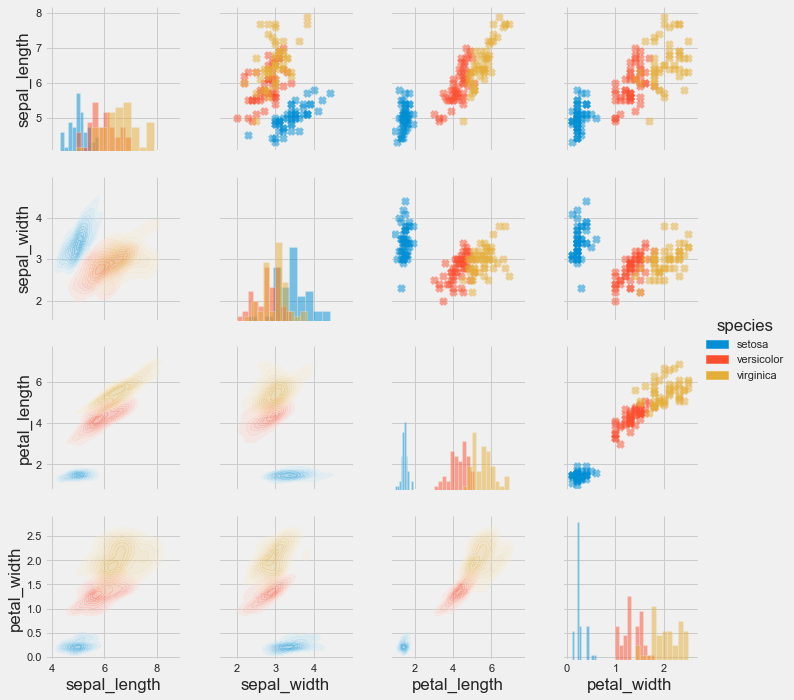

In [632]:
# Visualize the data part one
g = sns.PairGrid(df, hue="species")
g.map_diag(plt.hist, alpha=0.5)
g.map_upper(plt.scatter, alpha=0.5, marker='x')
g.map_lower(sns.kdeplot, shade=True, shade_lowest=False, alpha=0.3)
g.add_legend();

#### Famously, while it’s easy to see from theese plots that Iris setosa is linearly separable from the other two species, the versicolor and virginica flowers are not linearly separable. We can see this another way by looking at box plots of the measured attributes:

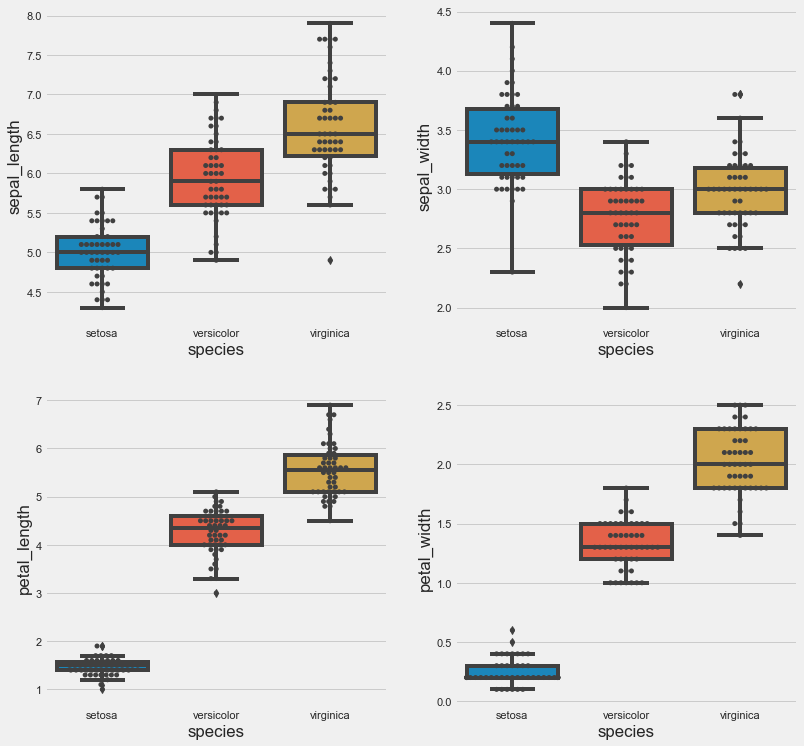

In [633]:
# Visualize the data part two

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))

sns.boxplot(x="species", y="sepal_length", data=df, ax=axs[0, 0])
sns.swarmplot(x="species", y="sepal_length", data=df, color=".25", ax=axs[0, 0])

sns.boxplot(x="species", y="sepal_width", data=df, ax=axs[0, 1])
sns.swarmplot(x="species", y="sepal_width", data=df, color=".25", ax=axs[0, 1])

sns.boxplot(x="species", y="petal_length", data=df, ax=axs[1, 0])
sns.swarmplot(x="species", y="petal_length", data=df, color=".25", ax=axs[1, 0])

sns.boxplot(x="species", y="petal_width", data=df, ax=axs[1, 1])
sns.swarmplot(x="species", y="petal_width", data=df, color=".25", ax=axs[1, 1])

#### Convert the Data frame to ndarray

In [634]:
# Convert data to a ndarray for blob plot
X_data = x.to_numpy()

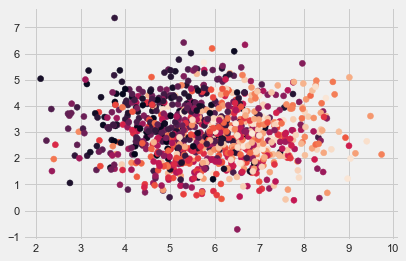

In [635]:
# Blob plot-how scattered the data is
blobs, blob_labels = make_blobs(n_samples=1000, n_features=2, 
                                centers=X_data, random_state=1)

a = plt.scatter(blobs[:, 0], blobs[:, 1], c=blob_labels)

#### Clearly Data is Quite scattered and This data needs to be clustered to find a group.

### Lets Plot the Categorical Values of the three 

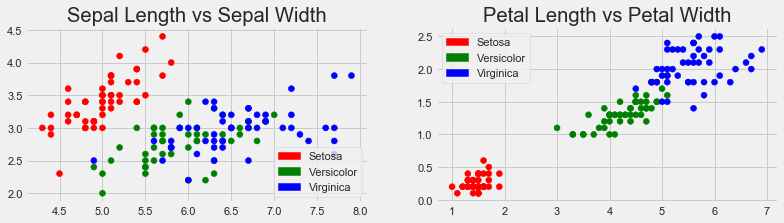

In [636]:
# plot the data
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])


### As we have three types of flower, we dont need to find the optimum cluster. Quiz Does not ask  to do the elbow method

### We start with the initial K means as stated in Part B of the Assignment

In [637]:
# Create a result data frame
result_matrix = pd.DataFrame()

# initial k mean 
iris_k_mean_model_initial = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1, n_init = 10, random_state = 0)
iris_k_mean_model_initial.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [638]:
# Get the results
print(iris_k_mean_model_initial.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [639]:
# Get the Clsuter centres 
print (iris_k_mean_model_initial.cluster_centers_)

[[6.85277778 3.075      5.78611111 2.09722222]
 [5.006      3.418      1.464      0.244     ]
 [5.9296875  2.7578125  4.4109375  1.4390625 ]]


In [640]:
# Get he Inertia
print (iris_k_mean_model_initial.inertia_)

79.11560616319444


#### Add Initial Result to Matrix

In [641]:
# Add result to the Result matrix for final comparison
a_row = pd.Series([1,10,0,0.0001,iris_k_mean_model_initial.inertia_,sm.accuracy_score(predictedY, y['Target'])])
row_df = pd.DataFrame([a_row])
result_matrix = pd.concat([row_df, result_matrix], ignore_index=False)


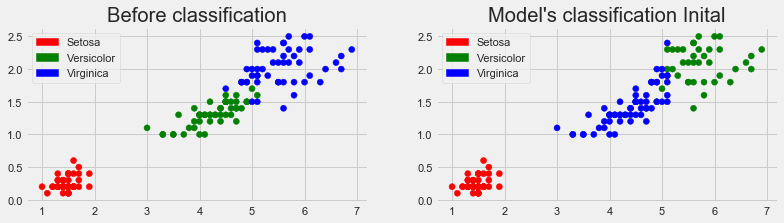

In [642]:
# Plot data from the classification
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
predictedY = np.choose(iris_k_mean_model_initial.labels_, [1, 0, 2]).astype(np.int64)
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification Inital")
plt.legend(handles=[red_patch, green_patch, blue_patch])

###  Initial Accuracy Score

In [643]:
#  Initial Accuracy Score
accuracy_initial = sm.accuracy_score(predictedY, y['Target'])
accuracy_initial

0.44

### initial Confusion Matrix

#### From the above matrix, systems is not able to corretcly classify 50+48+14+2 = 114 cases and it is only able to classify 36 cases correctly

In [644]:
# initial Confusion Matrix
intial_matrix = sm.confusion_matrix(predictedY, y['Target'])
initial_matrix

array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

### Run K-means algorithm 50 times over the Iris dataset, each time using a different initialization. For each run, compute both the accuracy of clustering, as well as the k-means objective function value of the final clustering

### Here we ar erandomising all the input variables, we are randomizing 'max_iter', 'n_init','random_state' and 'tol' to find  for what value we get the optimum accuracy

In [645]:
# Here we ar erandomising all the input variables, we are randomizing 'max_iter', 'n_init','random_state' and 'tol' to find 
# for what value we get the optimum accuracy
np.random.seed(2020)
for d in range(1,50):
    max_iter_temp = randint(1, 100) # Lets have a random number of iteration
    n_init_temp = randint(1, 1000)  # Lets have a random number of iteration
    random_state_temp = randint(0,10)  
    tol_temp = round(random.uniform(0.0001, 0.9999), 4)
    
    # we use Three clsuer as there is only three type of flowers.   
    iris_k_mean_model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = max_iter_temp, n_init = n_init_temp, tol = tol_temp,random_state = random_state_temp)
    # Run Kmeans in x  
    iris_k_mean_model.fit(x)
    #predictedY = np.choose(iris_k_mean_model.labels_, [randint(0, 2), randint(0, 2), randint(0, 2)]).astype(np.int64)
    #predic for the same result for all itertion, this is so that we can compare accuracy 
    predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)
    # Consoridate all variables into a data frame to be ploted next.
    #Status+='+'
    Status= 'Executing' + ':- ' + str(d+1) + ' ' + 'of' + ' ' + '50' 
    a_row = pd.Series([max_iter_temp,n_init_temp,random_state_temp,tol_temp,iris_k_mean_model.inertia_,sm.accuracy_score(predictedY, y['Target'])])
    row_df = pd.DataFrame([a_row])
    result_matrix = pd.concat([row_df, result_matrix], ignore_index=False)
    clear_output(wait=True)
    print(Status)
Status+=' => Done!'
clear_output(wait=True)
print(Status)

Executing:- 50 of 50 => Done!


In [646]:
# Change the header
result_matrix.columns=['max_iter', 'n_init','random_state', 'tol','inertia','accuracy']

In [647]:
#Shape and size
result_matrix.shape

(50, 6)

In [648]:
# Lets look at the first 5 record of the result tab
result_matrix.head()

,max_iter,n_init,random_state,tol,inertia,accuracy
0,19.0,831.0,7.0,0.9301,78.940841,0.893333
0,28.0,91.0,4.0,0.0049,78.940841,0.440000
0,25.0,232.0,8.0,0.8542,78.940841,0.893333
0,57.0,422.0,9.0,0.0844,78.940841,0.440000
0,28.0,534.0,3.0,0.1710,78.940841,0.893333


### Plot the distribution of accuracies and also plot the distribution of the objective function values

#### Accuracy Distribution plot

<Figure size 2160x2880 with 0 Axes>

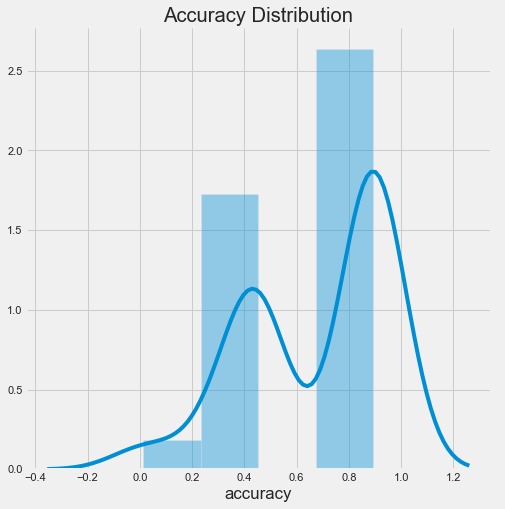

In [649]:
# Accuracy Distribution plot
plt.figure(figsize=(30,40))
sns.FacetGrid(result_matrix,size=7).map(sns.distplot,"accuracy").add_legend()
plt.title("Accuracy Distribution")
plt.show()

#### Objective function - Max_iter Distribution plot

<Figure size 2160x2880 with 0 Axes>

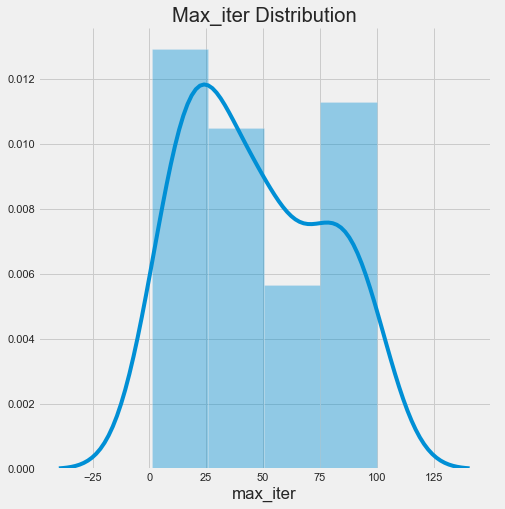

In [650]:
# Objective function - Max_iter Distribution plot
plt.figure(figsize=(30,40))
sns.FacetGrid(result_matrix,size=7).map(sns.distplot,"max_iter").add_legend()
plt.title("Max_iter Distribution")
plt.show()

#### Objective function - n_init Distribution plot

<Figure size 2160x2880 with 0 Axes>

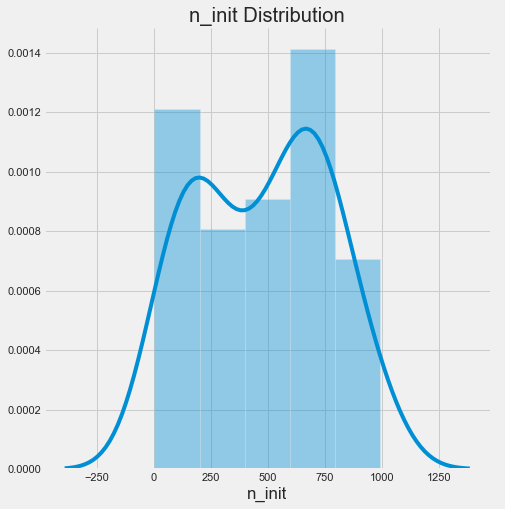

In [651]:
# Objective function - n_init Distribution plot
plt.figure(figsize=(30,40))
sns.FacetGrid(result_matrix,size=7).map(sns.distplot,"n_init").add_legend()
plt.title("n_init Distribution")
plt.show()

#### Objective function - random_state Distribution plot

<Figure size 2160x2880 with 0 Axes>

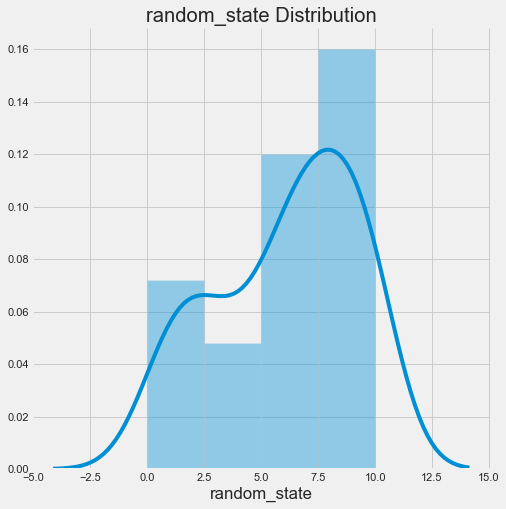

In [652]:
# Objective function - random_state Distribution plot
plt.figure(figsize=(30,40))
sns.FacetGrid(result_matrix,size=7).map(sns.distplot,"random_state").add_legend()
plt.title("random_state Distribution")
plt.show()

#### Objective function - tol Distribution plot

<Figure size 2160x2880 with 0 Axes>

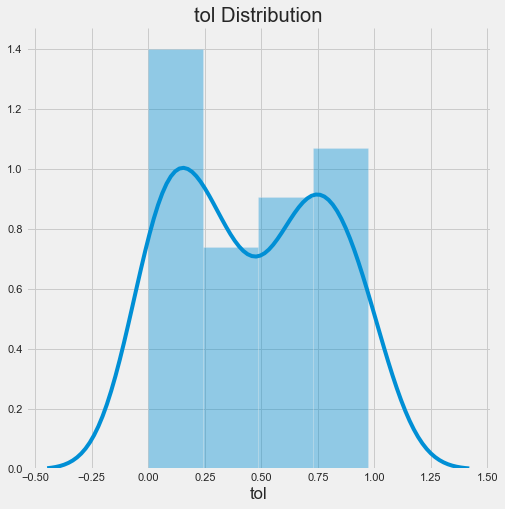

In [653]:
# Objective function - tol Distribution plot
plt.figure(figsize=(30,40))
sns.FacetGrid(result_matrix,size=7).map(sns.distplot,"tol").add_legend()
plt.title("tol Distribution")
plt.show()

#### Objective function - inertia Distribution plot for n_clusters = 3

<Figure size 2160x2880 with 0 Axes>

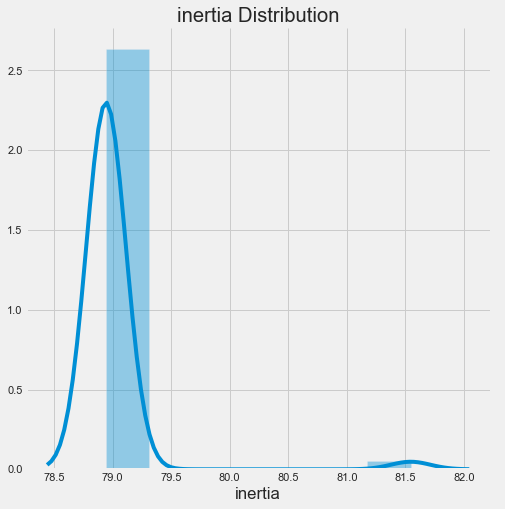

In [654]:
# Objective function - inertia Distribution plot for n_clusters = 3
plt.figure(figsize=(30,40))
sns.FacetGrid(result_matrix,size=7).map(sns.distplot,"inertia").add_legend()
plt.title("inertia Distribution")
plt.show()

### Scatter Plot showing correlation between clustering accuracy and the clustering objective function value. 

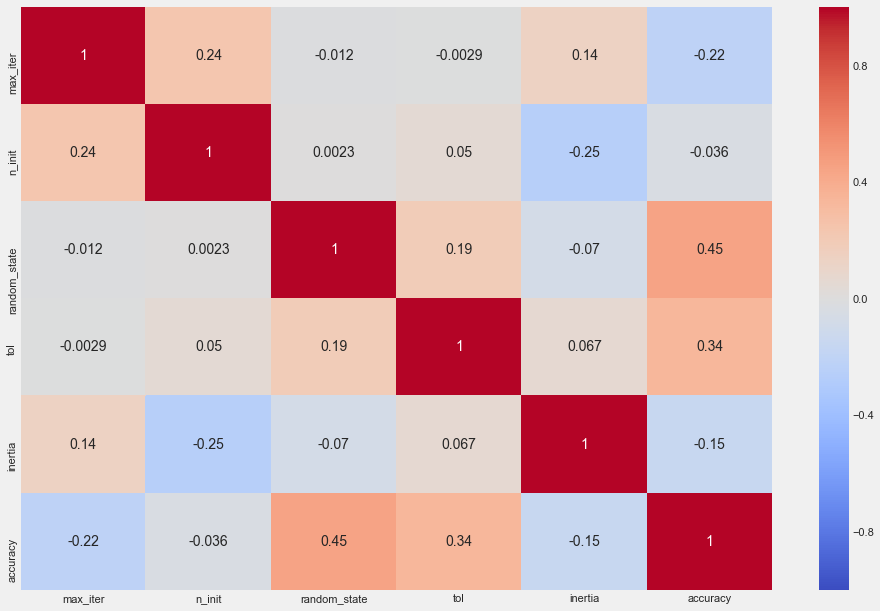

In [655]:
# Scatter Plot showing correlation between clustering accuracy and the clustering objective function value. 
plt.figure(figsize=(15,10))
sns.heatmap(result_matrix.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### Scatter Plot showing correlation between clustering accuracy and the clustering objective function Max_iter

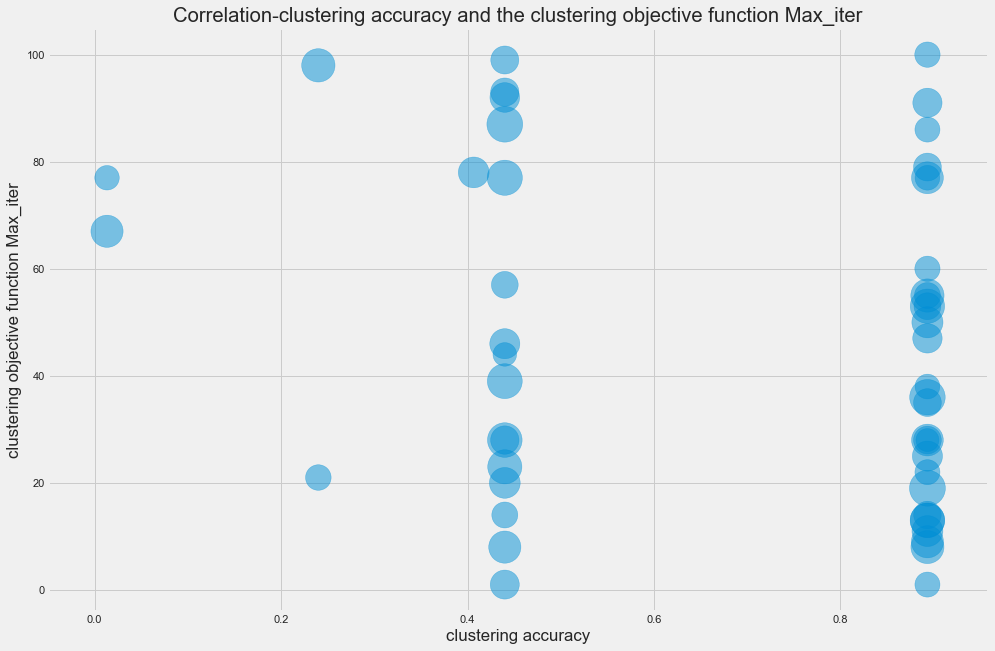

In [656]:
# Scatter Plot showing correlation between clustering accuracy and the clustering objective function Max_iter
s = np.random.rand(*result_matrix.shape) * 800 + 500
plt.figure(figsize=(15,10))
plt.scatter(result_matrix['accuracy'],result_matrix['max_iter'],  alpha=0.5, marker='o', s=s)
plt.xlabel("clustering accuracy")
plt.ylabel("clustering objective function Max_iter")
plt.title("Correlation-clustering accuracy and the clustering objective function Max_iter")
plt.show()

#### Scatter Plot showing correlation between clustering accuracy and the clustering objective function n_init

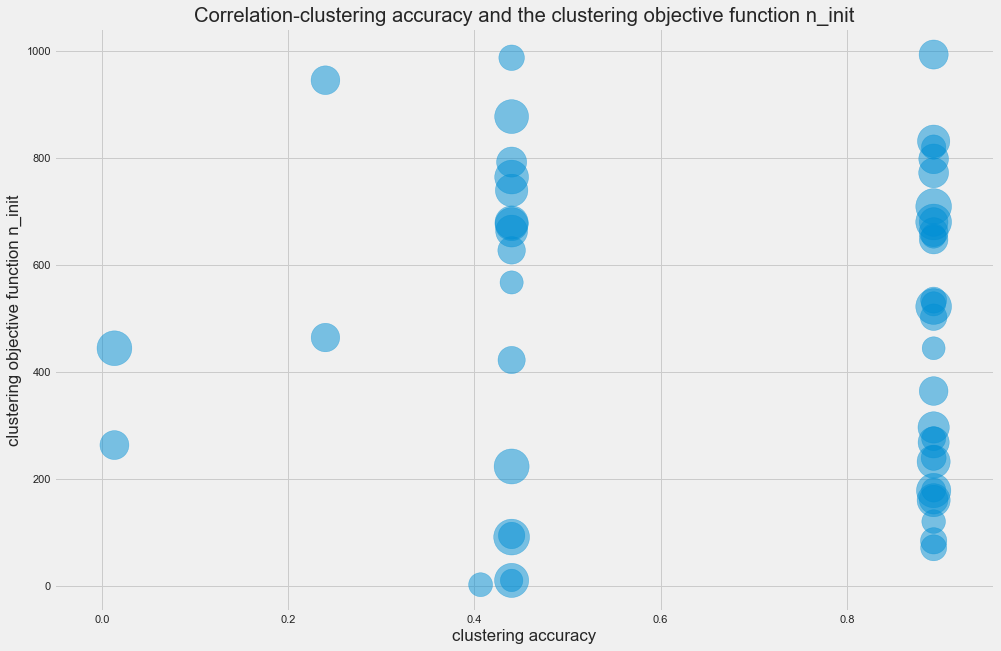

In [657]:
# Scatter Plot showing correlation between clustering accuracy and the clustering objective function n_init
s = np.random.rand(*result_matrix.shape) * 800 + 500
plt.figure(figsize=(15,10))
plt.scatter(result_matrix['accuracy'],result_matrix['n_init'],  alpha=0.5, marker='o', s=s)
plt.xlabel("clustering accuracy")
plt.ylabel("clustering objective function n_init")
plt.title("Correlation-clustering accuracy and the clustering objective function n_init")
plt.show()

#### Scatter Plot showing correlation between clustering accuracy and the clustering objective function random_state

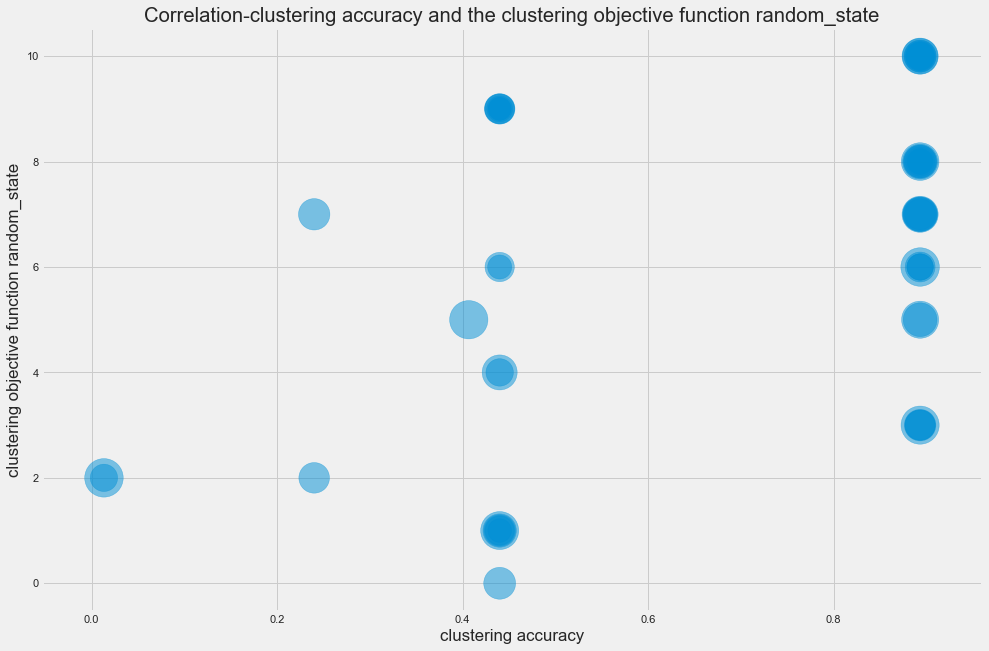

In [658]:
# Scatter Plot showing correlation between clustering accuracy and the clustering objective function random_state
s = np.random.rand(*result_matrix.shape) * 1000 + 500
plt.figure(figsize=(15,10))
plt.scatter(result_matrix['accuracy'],result_matrix['random_state'],  alpha=0.5, marker='o', s=s)
plt.xlabel("clustering accuracy")
plt.ylabel("clustering objective function random_state")
plt.title("Correlation-clustering accuracy and the clustering objective function random_state")
plt.show()

#### Scatter Plot showing correlation between clustering accuracy and the clustering objective function tol

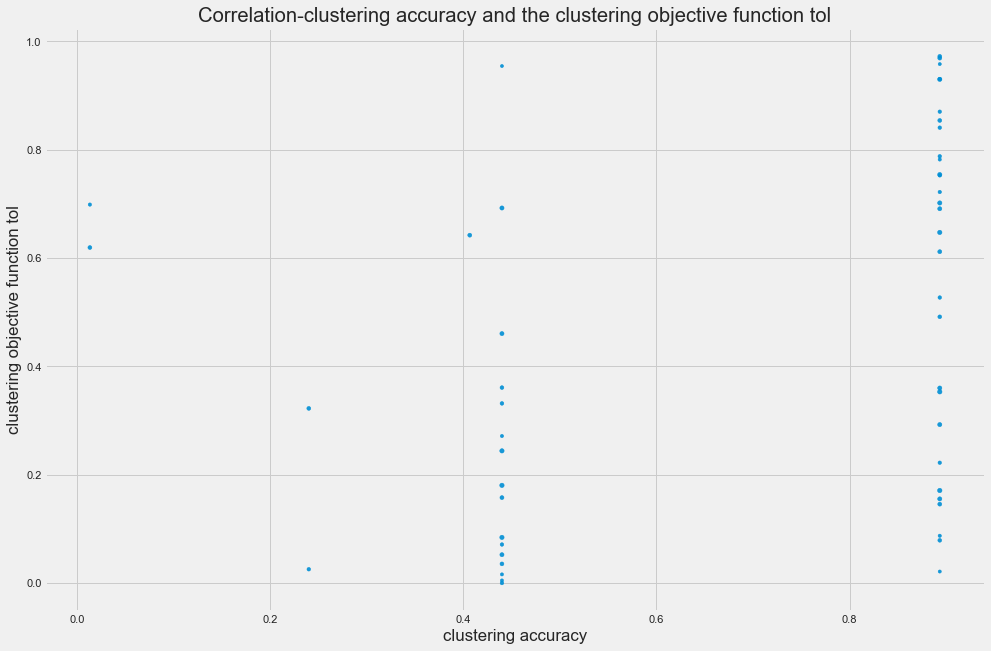

In [659]:
# Scatter Plot showing correlation between clustering accuracy and the clustering objective function tol
s = np.random.rand(*result_matrix.shape) * 10 + 10
plt.figure(figsize=(15,10))
plt.scatter(result_matrix['accuracy'],result_matrix['tol'],  alpha=0.9, marker='o', s=s)
plt.xlabel("clustering accuracy")
plt.ylabel("clustering objective function tol")
plt.title("Correlation-clustering accuracy and the clustering objective function tol")
plt.show()

In [660]:
# Lets have a look at the result matrix
result_matrix.sort_values(by= ['accuracy'], ascending=False)

,max_iter,n_init,random_state,tol,inertia,accuracy
0,19.0,831.0,7.0,0.9301,78.940841,0.893333
0,9.0,178.0,10.0,0.9726,78.940841,0.893333
0,50.0,820.0,7.0,0.9693,78.940841,0.893333
0,60.0,522.0,8.0,0.2223,78.940841,0.893333
0,86.0,84.0,10.0,0.9307,78.940841,0.893333
0,47.0,993.0,8.0,0.6475,78.940841,0.893333
0,28.0,268.0,3.0,0.4917,78.940841,0.893333
0,100.0,661.0,3.0,0.0874,78.940841,0.893333
0,53.0,772.0,7.0,0.5273,78.940841,0.893333
0,91.0,239.0,6.0,0.8409,78.940841,0.893333


## From the able result table we randomly choose the Final K means where  
### max_iter = 5, n_init = 144, tol = 0.3945,random_state = 7

In [661]:
# we use Three clsuer as there is only three type of flowers.   
iris_k_mean_model_final = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 5, n_init = 144, tol = 0.3945,random_state = 7)
    # Run Kmeans in x  
iris_k_mean_model_final.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=5,
       n_clusters=3, n_init=144, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.3945, verbose=0)

In [662]:
# Prect same data as initial but with new model
predictedY_final = np.choose(iris_k_mean_model_final.labels_, [1, 0, 2]).astype(np.int64)

In [663]:
# Final Accuracy
accuracy_final = sm.accuracy_score(predictedY_final, y['Target'])
accuracy_final

0.8933333333333333

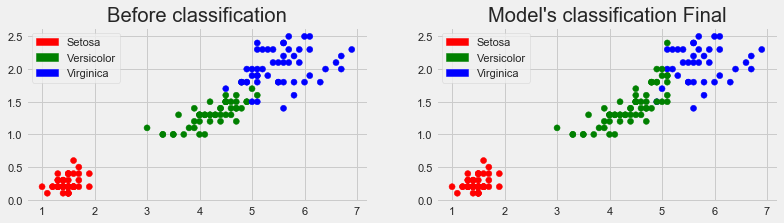

In [664]:
# Lets now plot the final classification
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predictedY_final = np.choose(iris_k_mean_model_final.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification Final")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [665]:
# Final Confusion matrix
final_matrix = sm.confusion_matrix(predictedY_final, y['Target'])
final_matrix

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

## Lets Compare Initial and final Model

#### Initial Vs Final Accuracy

In [666]:
print('Initial Accuracy', accuracy_initial)

Initial Accuracy 0.44


In [667]:
print('Final Accuracy', accuracy_final)

Final Accuracy 0.8933333333333333


### Clearly Accuracy is better for the final model

## Lets Compare Initial and final Confusion Matrix

In [668]:
print('Initial Confusion Matrix:-')
initial_matrix

Initial Confusion Matrix:-


array([[ 0, 48, 14],
       [50,  0,  0],
       [ 0,  2, 36]], dtype=int64)

#### From the above matrix, systems is not able to corretcly classify 50+48+14+2 = 114 cases and it is only able to classify 36 cases correctly

In [669]:
print('Final Confusion Matrix:-')
final_matrix

Final Confusion Matrix:-


array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

#### From the above matrix, systems is not able to corretcly classify 14+2 = 16 cases and it is able to classify 36+48+50 cases correctly

## Final Verdict---> Final K mean model is better than Initial one.